## Preamble

In [1]:
SetDirectory["~/Documents/Univ/small_scale_curvaton/math"];

In [2]:
SetOptions[{Plot,LogPlot,LogLinearPlot,LogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3]}];
SetOptions[{ListPlot,ListLogPlot,ListLogLinearPlot,ListLogLogPlot},
           {ImageSize->Large,
            Frame->True, 
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3],
            Joined->True}];
RGBData = {"#5E81B5","#E19C24","#8FB032","#EB6235","#8778B3","#C56E1A","#5D9EC7","#FFBF00","#A5609D","#929600","#E95536","#6685D9","#F89F13","#BC5B80","#47B66D"};
Color = Map[RGBColor,RGBData];

## Test

In [202]:
V[x_] = m^2 f^2 (1-Cos[x/f]);
H[t_] = 1/2/t;

In [204]:
m1 = 1;
f1 = 1;
ti = 10^-2/m1;
tf = 10^3/2/m1;
ri1 = \[Pi]-0.001;
ri2 = \[Pi]/2;
ri3 = \[Pi]/4;

The precision of the differential equation (`1`) is less than WorkingPrecision (`2`).:                                                           3 x'[t]                   1                   1
The precision of the differential equation ({{Sin[x[t]] + ------- + x''[t] == 0, x[---] == 3.14059, x'[---] == 0}, {}, {}, {}, {}}) is less than WorkingPrecision (30.).
                                                            2 t                    100                 100

{0.908439, Null}
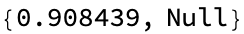

In [211]:
sol1 = NDSolve[{x''[t]+3H[t]x'[t]+V'[x[t]]==0, x[ti]==ri1 f, x'[ti]==0} /. {m->m1,f->f1}, {x[t],x'[t]}, {t,ti,tf}
            ,WorkingPrecision->30 ,MaxSteps->10^6][[1]]; // AbsoluteTiming
sol2 = NDSolve[{x''[t]+3H[t]x'[t]+V'[x[t]]==0, x[ti]==ri2 f, x'[ti]==0} /. {m->m1,f->f1}, {x[t],x'[t]}, {t,ti,tf}][[1]];
sol3 = NDSolve[{x''[t]+3H[t]x'[t]+V'[x[t]]==0, x[ti]==ri3 f, x'[ti]==0} /. {m->m1,f->f1}, {x[t],x'[t]}, {t,ti,tf}][[1]];

In [214]:
xsol1[t_] = x[t] /. sol1;
xsol2[t_] = x[t] /. sol2;
xsol3[t_] = x[t] /. sol3;
xpsol1[t_] = x'[t] /. sol1;
xpsol2[t_] = x'[t] /. sol2;
xpsol3[t_] = x'[t] /. sol3;
rho1[t_] = V[xsol1[t]] + 1/2 xpsol1[t]^2 /. {m->m1,f->f1};
rho2[t_] = V[xsol2[t]] + 1/2 xpsol2[t]^2 /. {m->m1,f->f1};
rho3[t_] = V[xsol3[t]] + 1/2 xpsol3[t]^2 /. {m->m1,f->f1};

-Graphics-
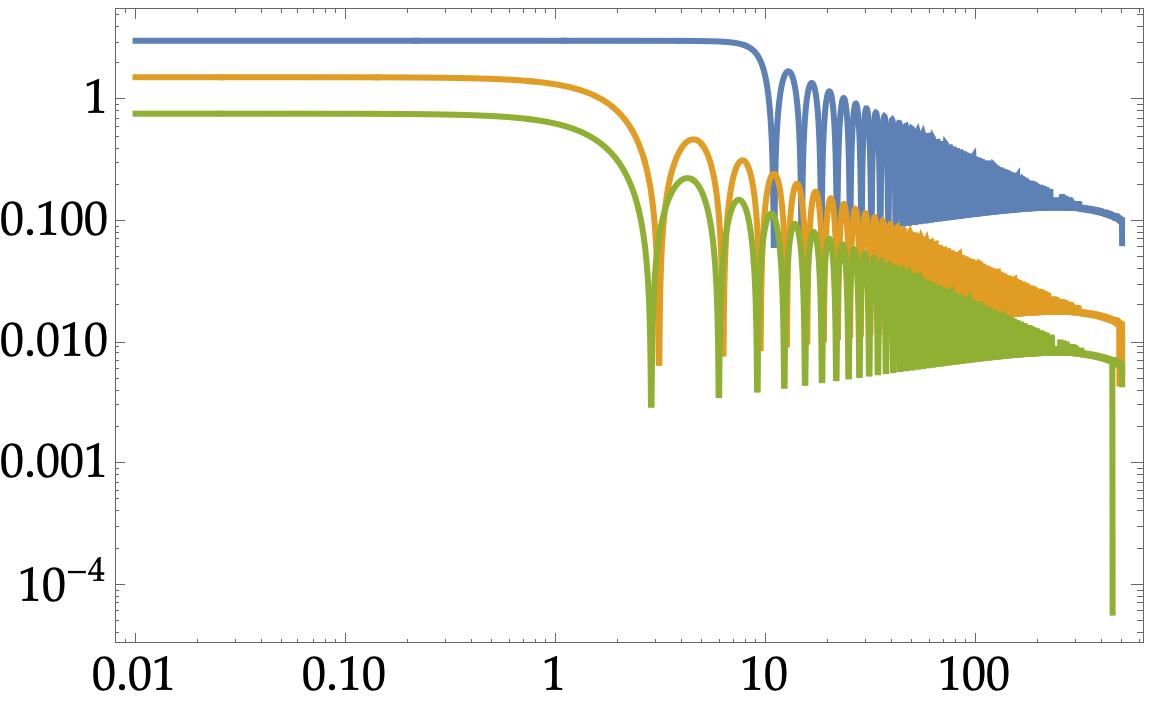

In [223]:
LogLogPlot[{Abs[xsol1[t]],Abs[xsol2[t]],Abs[xsol3[t]]}, {t,ti,tf}(*, PlotRange->{0.01,3}*)]

-Graphics-
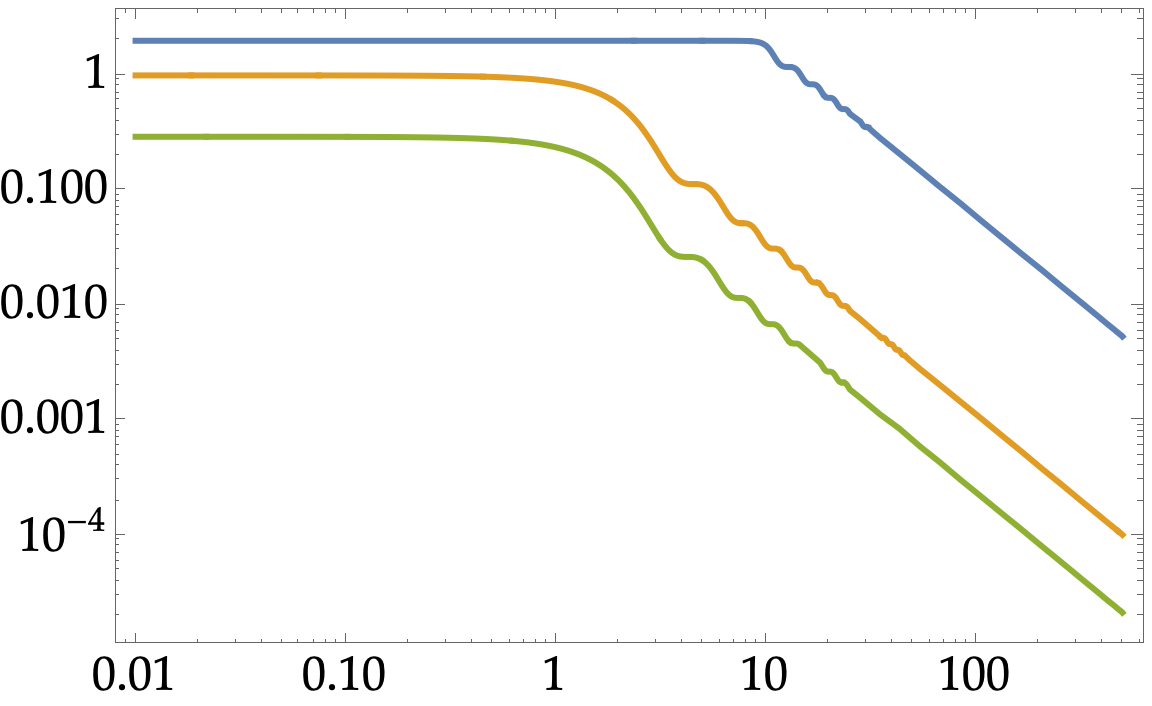

In [224]:
LogLogPlot[{rho1[t], rho2[t], rho3[t]}, {t,ti,tf}]

In [225]:
g1 = Sqrt[2rho1[tf] / m^2] /. {m->m1, f->f1}
g2 = Sqrt[2rho2[tf] / m^2] /. {m->m1, f->f1}
g3 = Sqrt[2rho3[tf] / m^2] /. {m->m1, f->f1}

0.1038030557416259420753900356
0.0142699
0.00655106

-Graphics-
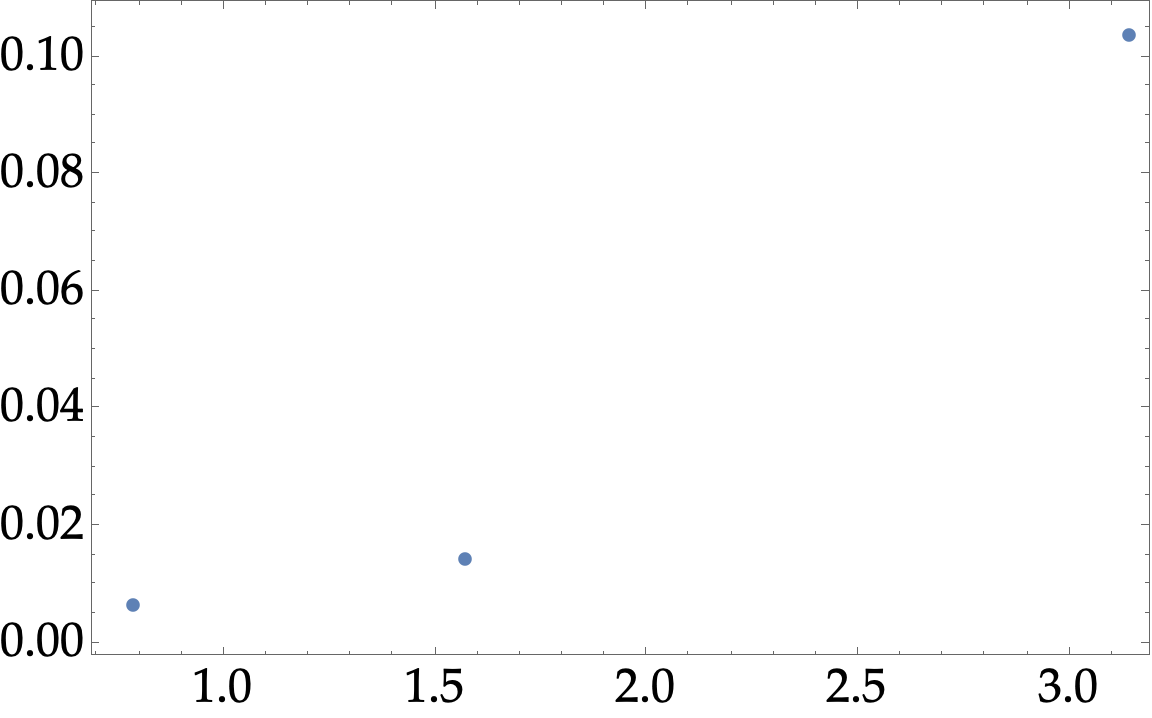

In [228]:
ListPlot[{{ri1,g1},{ri2,g2},{ri3,g3}}, Joined->False]

## cos type

In [507]:
V[x_] = m^2 f^2 (1-Cos[x/f]);
H[t_] = 1/2/t;

In [509]:
V''[0]

2
m

-Graphics-
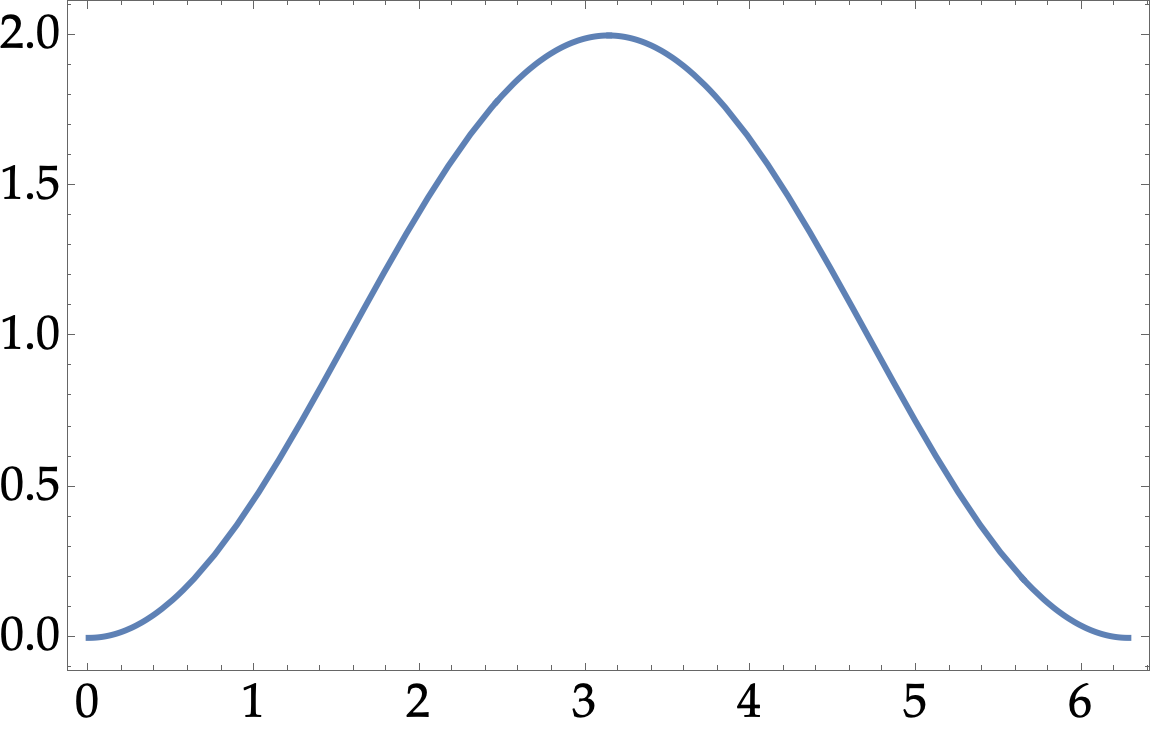

In [510]:
Plot[V[x]/.{m->1,f->1},{x,0,2\[Pi]}]

In [511]:
m1 = 1;
f1 = 1;
ti = 10^-2/m1;
tf = 10^3/2/m1;

{619.127, Null}
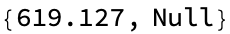

In [516]:
solList = Table[{ri, NDSolve[{x''[t]+3H[t]x'[t]+V'[x[t]]==0, x[ti]==ri \[Pi] f, x'[ti]==0} /. {m->m1,f->f1}, 
                        {x[t],x'[t]}, {t,ti,tf}, WorkingPrecision->30 ,MaxSteps->10^6][[1]] // Quiet}, 
            {ri,0,1-0.001,0.001}]; // AbsoluteTiming

In [517]:
gList = Table[{solList[[i,1]], Sqrt[2(V[x[t]] + 1/2 x'[t]^2) /m^2/f^2 /. solList[[i,2]] /. {m->m1,f->f1,t->tf}]}, {i,Length[solList]}];

In [518]:
gint[x_] = Interpolation[gList][x];

In [519]:
padding = {{80,10},{100,10}};

-Graphics-
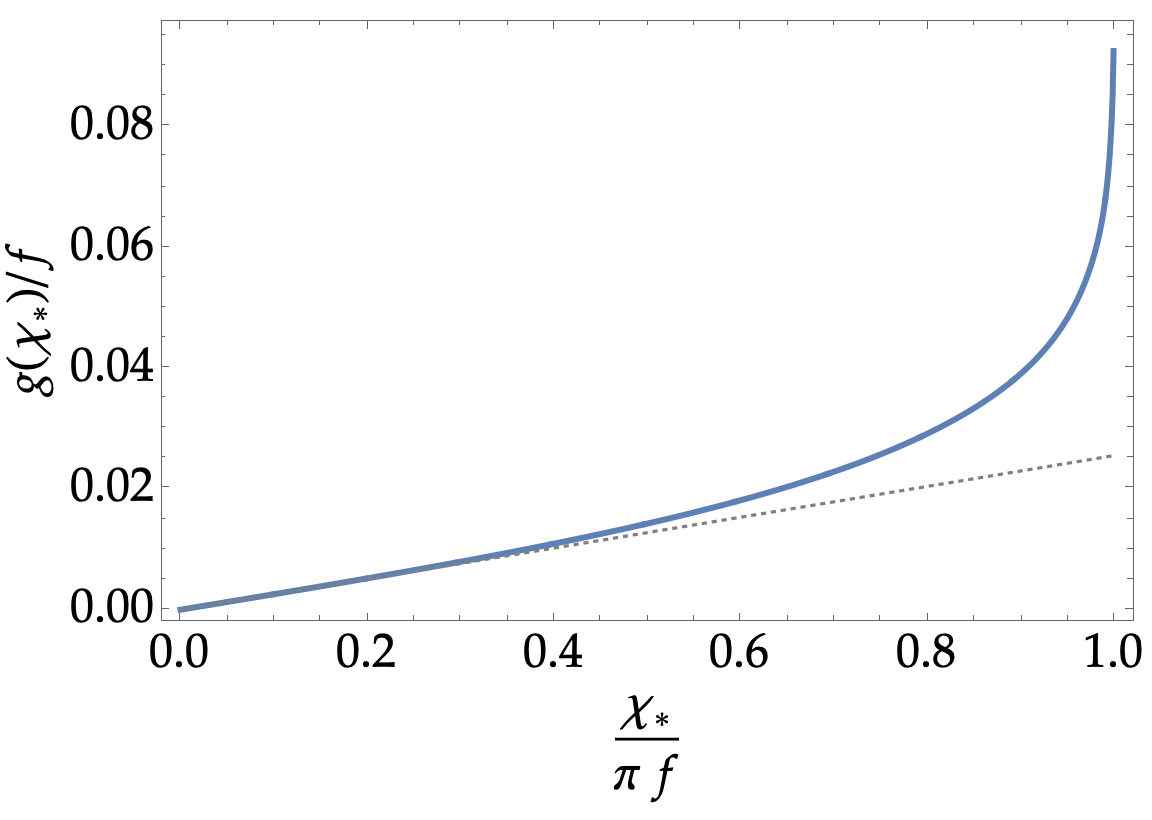

In [522]:
Clear[V]
FiggCos = 
Show[ListPlot[gList,FrameLabel->{{Row[{g[Subscript[\[Chi],"*"]],"/",f}],None}, 
                                {Subscript[\[Chi],"*"]/\[Pi]/f,
                                    (*Row[{V[\[Chi]]==\[CapitalLambda]^4(1-Cos[\[Chi]/f]) ," ,   " 
                                        ,Subscript[\[CapitalGamma],"dec"]==10^-3 m}]*) None}}],
    Plot[gint'[0]x,{x,0,1}, PlotStyle->{Gray,Dotted}] 
    ,ImagePadding->padding (*,ImageSize->Medium ,LabelStyle->Directive[Black,Larger,FontFamily->"Palatino"]*)]

In [264]:
Export["g_cos.pdf", FiggCos];

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
                                                             2    2   2  (3)
                                                            g  g''   g  g
>       AbsoluteThickness[1.6], Dashing[{Small, Small}]]}, {-------, -------}, 
                                                                4        3
                                                              g'       g'
 
>     LegendMarkers -> None, LabelStyle -> 
 
>      Directive[GrayLevel[0], Large, FontFamily -> Palatino], LegendLayout -> Column], 
 
>    {0.2, 0.7}, Identity]]
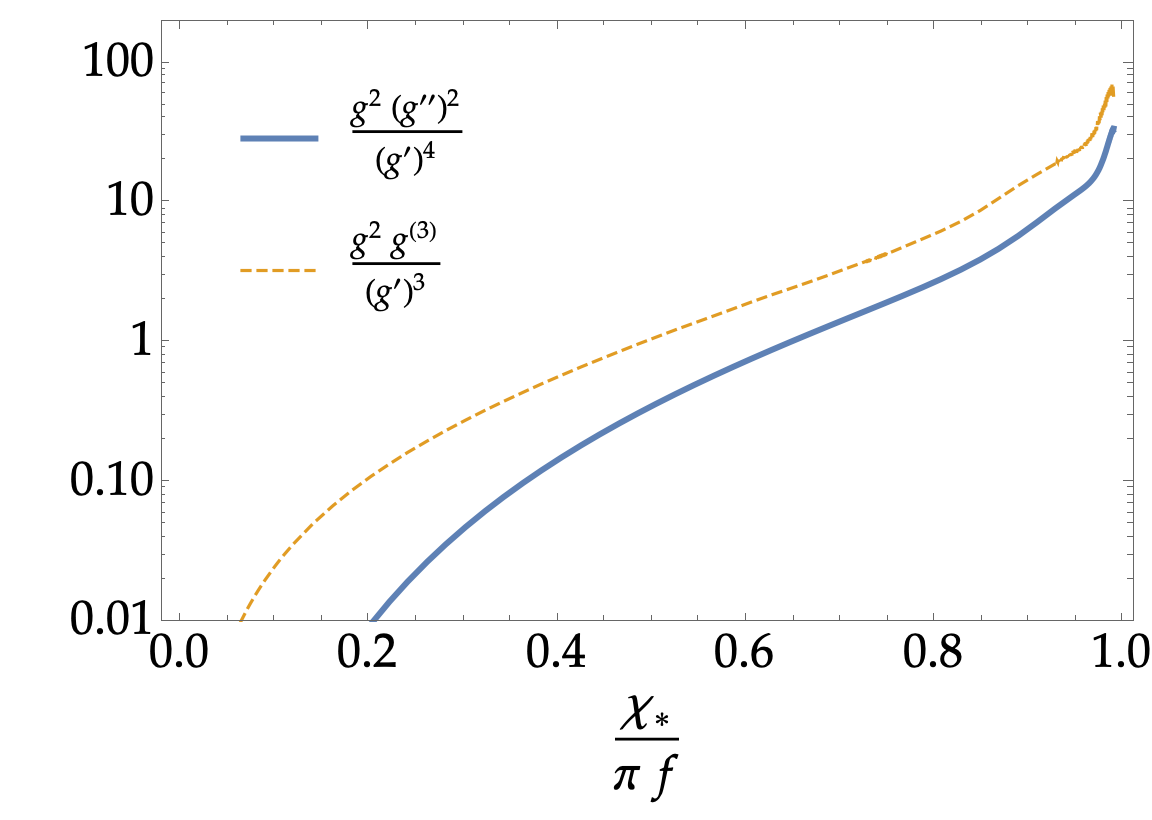

In [524]:
FiggderCos = 
LogPlot[{gint[x]^2gint''[x]^2/gint'[x]^4, gint[x]^2 gint'''[x]/gint'[x]^3}, {x,0,1-0.01} ,PlotRange->{0.01,200}
    ,PlotStyle->{AbsoluteThickness[3],Dashed} ,PlotLegends->Placed[{(g g''/g'^2)^2,g^2g'''/g'^3} ,{0.2,0.7}]
    ,FrameLabel->{{None ,None}, {Subscript[\[Chi],"*"]/\[Pi]/f,
                                    (*Row[{V[\[Chi]]==\[CapitalLambda]^4(1-Cos[\[Chi]/f]) ," ,   " 
                                        ,Subscript[\[CapitalGamma],"dec"]==10^-3 m}]*) None}}
    ,ImagePadding->padding (*,ImageSize->Medium ,LabelStyle->Directive[Black,Larger,FontFamily->"Palatino"]*)]

In [267]:
Export["gder_cos.pdf", FiggderCos];

-Graphics-
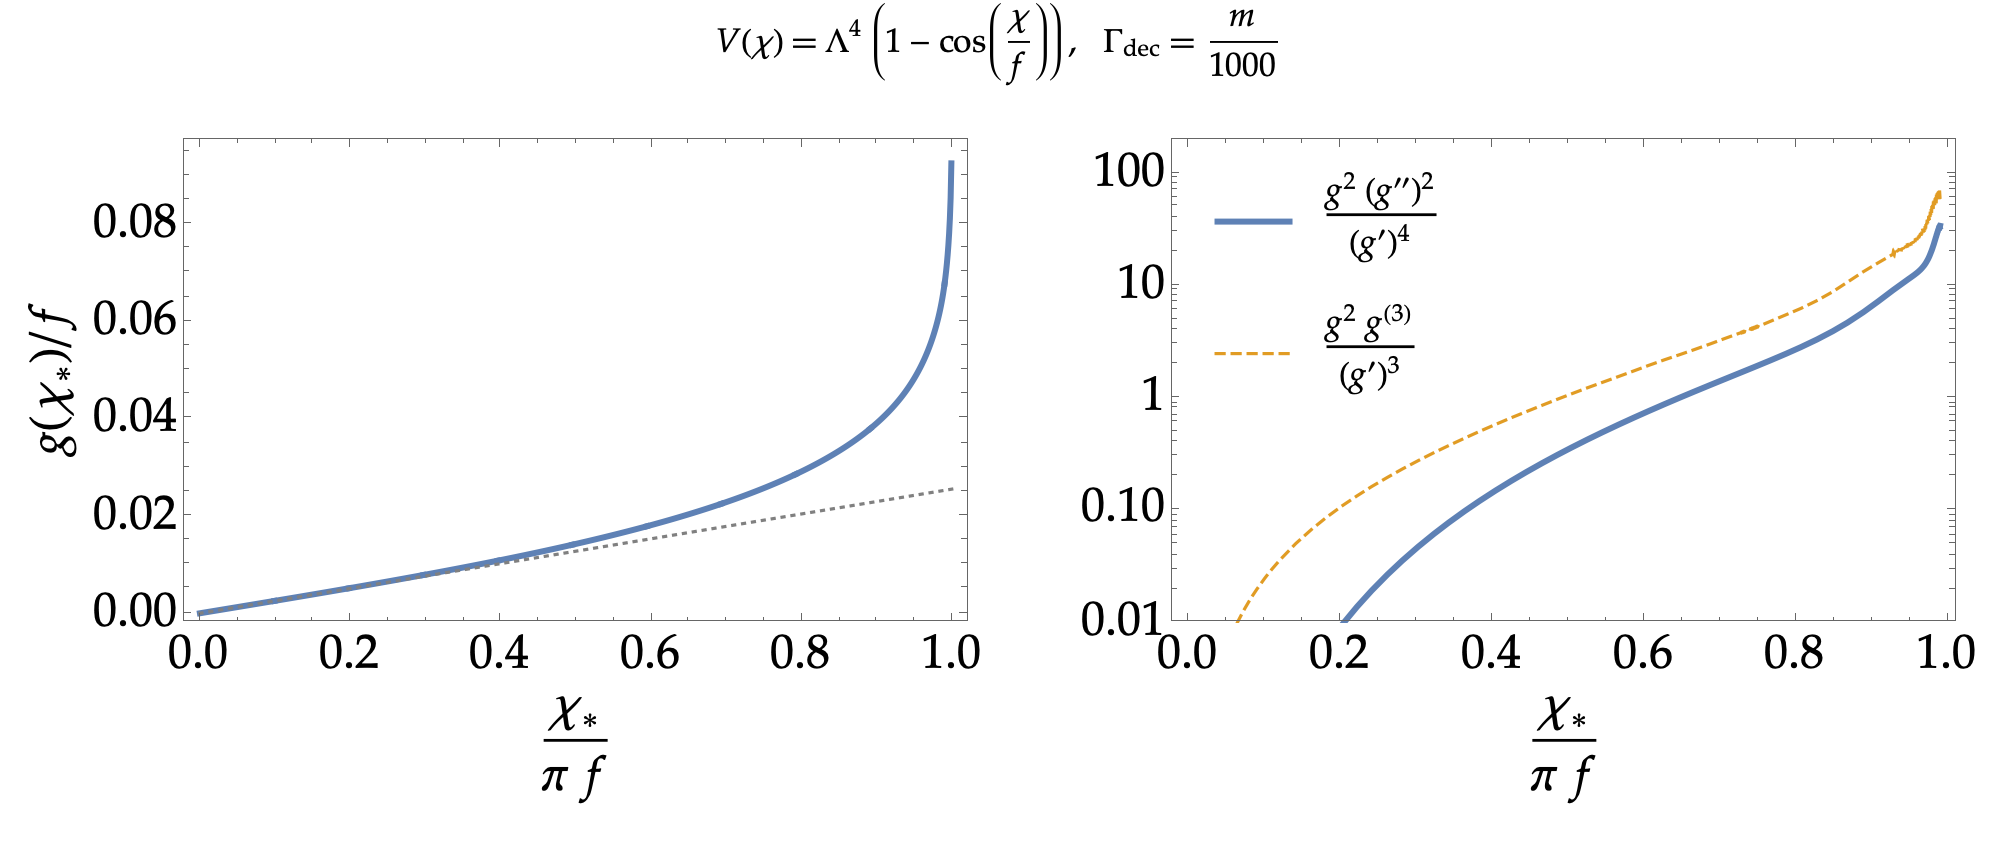

In [525]:
FiggandgderCos = 
Show[GraphicsRow[{FiggCos,FiggderCos} ,ImageSize->1000 ,Spacings->0] 
    ,PlotLabel->Row[{V[\[Chi]]==\[CapitalLambda]^4(1-Cos[\[Chi]/f]) ," ,   " 
                        ,Subscript[\[CapitalGamma],"dec"]==10^-3 m}]
    ,LabelStyle->Directive[Black,Larger,FontFamily->"Palatino"]]

In [526]:
Export["g_gder_cos.pdf", FiggandgderCos];

## phi4 type

In [324]:
V[x_] = 1/4 lambda x^4 + 1/2 m^2 x^2;
H[t_] = 1/2/t;

In [326]:
lambda1 = 1;
m1 = 1;
ti = 10^-3/m1;
tf = 10^3/2/m1;

In [330]:
xt = x /. Solve[(1/4 lambda1 x^4) / (1/2 m1^2 x^2) == 1, x][[2]];
xt/m1

Sqrt[2]

In [332]:
sol1 = NDSolve[{x''[t]+3H[t]x'[t]+V'[x[t]]==0, x[ti]==100xt, x'[ti]==0} /. {lambda->lambda1,m->m1}, {x[t],x'[t]}, {t,ti,tf}
        ,WorkingPrecision->30 (*,Method->"ImplicitRungeKutta"*) ,MaxSteps->10^6][[1]]; (*// Quiet*) // AbsoluteTiming
sol2 = NDSolve[{x''[t]+3H[t]x'[t]+V'[x[t]]==0, x[ti]==10xt, x'[ti]==0} /. {lambda->lambda1,m->m1}, {x[t],x'[t]}, {t,ti,tf}
        (*,WorkingPrecision->30*) (*,Method->"ImplicitRungeKutta"*)][[1]]; // Quiet // AbsoluteTiming
sol3 = NDSolve[{x''[t]+3H[t]x'[t]+V'[x[t]]==0, x[ti]==0.1xt, x'[ti]==0} /. {lambda->lambda1,m->m1}, {x[t],x'[t]}, {t,ti,tf}
        (*,WorkingPrecision->30*) (*,Method->"ImplicitRungeKutta"*)][[1]]; // Quiet // AbsoluteTiming
sol4 = NDSolve[{x''[t]+3H[t]x'[t]+V'[x[t]]==0, x[ti]==0.01xt, x'[ti]==0} /. {lambda->lambda1,m->m1}, {x[t],x'[t]}, {t,ti,tf}
        (*,WorkingPrecision->30*) (*,Method->"ImplicitRungeKutta"*)][[1]]; // Quiet // AbsoluteTiming

{3.87532, Null}
{0.013252, Null}
{0.008679, Null}
{0.007196, Null}

In [336]:
xsol1[t_] = x[t] /. sol1;
xsol2[t_] = x[t] /. sol2;
xsol3[t_] = x[t] /. sol3;
xsol4[t_] = x[t] /. sol4;
xpsol1[t_] = x'[t] /. sol1;
xpsol2[t_] = x'[t] /. sol2;
xpsol3[t_] = x'[t] /. sol3;
xpsol4[t_] = x'[t] /. sol4;
rho1[t_] = V[xsol1[t]] + 1/2 xpsol1[t]^2 /. {lambda->lambda1,m->m1};
rho2[t_] = V[xsol2[t]] + 1/2 xpsol2[t]^2 /. {lambda->lambda1,m->m1};
rho3[t_] = V[xsol3[t]] + 1/2 xpsol3[t]^2 /. {lambda->lambda1,m->m1};
rho4[t_] = V[xsol4[t]] + 1/2 xpsol4[t]^2 /. {lambda->lambda1,m->m1};

-Graphics-
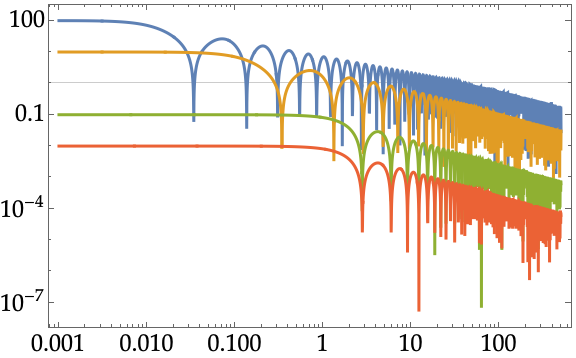

In [348]:
LogLogPlot[{Abs[xsol1[t/m1]]/xt, Abs[xsol2[t/m1]]/xt, Abs[xsol3[t/m1]]/xt ,Abs[xsol4[t/m1]]/xt}, {t,ti m1,tf m1} ,GridLines->{None,{1}}]

-Graphics-
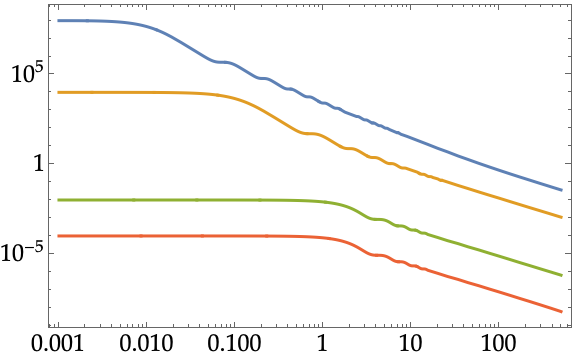

In [349]:
LogLogPlot[{rho1[t],rho2[t],rho3[t],rho4[t]},{t,ti,tf}]

In [350]:
solList = Table[{10^logri, NDSolve[{x''[t]+3H[t]x'[t]+V'[x[t]]==0, x[ti]==10^logri xt, x'[ti]==0} /. {lambda->lambda1,m->m1}, 
                        {x[t],x'[t]}, {t,ti,tf} ,WorkingPrecision->30 ,MaxSteps->10^6 (*,Method->"ImplicitRungeKutta"*)][[1]] // Quiet}, 
            {logri,-2,2,0.01}]; // AbsoluteTiming

{537.732, Null}

In [351]:
gList = Table[{solList[[i,1]], Sqrt[2(V[x[t]] + 1/2 x'[t]^2)/m1^2/xt^2 /. solList[[i,2]] /. {lambda->lambda1,m->m1,t->tf}]}, {i,Length[solList]}];

-Graphics-
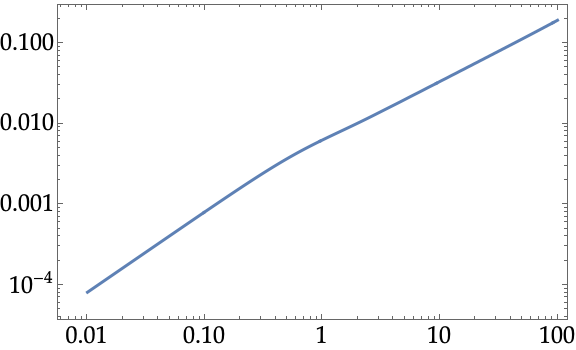

In [352]:
ListLogLogPlot[gList]

In [354]:
gfitlow[x_] = a x /. FindFit[Select[gList,#[[1]]<0.1&], a x, a, x]
gfithigh[x_] = a x^n /. FindFit[Select[gList,#[[1]]>10&], a x^n, {a,n}, x]

0.00810829 x
            0.760957
0.00573429 x

In [495]:
padding = {{100,10},{70,10}};

-Graphics-
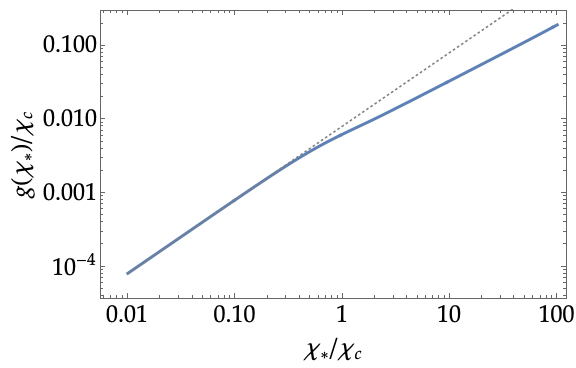

In [500]:
Clear[V]
FiggPhi4 = 
Show[ListLogLogPlot[gList ,FrameLabel->{{Row[{g[Subscript[\[Chi],"*"]] ,"/" ,Subscript[\[Chi],c]}], None}, 
                                {Row[{Subscript[\[Chi],"*"] ,"/" ,Subscript[\[Chi],c]}], 
                                (*Row[{V[\[Chi]]==1/2 m^2 \[Chi]^2 + 1/4 \[Lambda] \[Chi]^4 ," ,   " ,Subscript[\[CapitalGamma],"dec"]==10^-3 m}]*) None }}] 
    ,LogLogPlot[gfitlow[x] ,{x,0.01,100}　,PlotStyle->{Gray,Dotted}]
    ,ImagePadding->padding]

In [315]:
Export["g_phi4.pdf" ,Figgphi4];

In [392]:
Length[gList]

401

In [401]:
gint[x_] = Interpolation[gList][x];

In [413]:
gint[10]
10^NIntegrate[Log10[gint[10^(1+logx)]],{logx,-0.5,0.5}]

0.0334125
0.0334297

In [451]:
gsmoothList = Table[{10^logx, 10^(NIntegrate[Log10[gint[10^(logx+logy)]],{logy,-0.2,0.2}]/0.4)},{logx,-2,2,0.01}];

-Graphics-
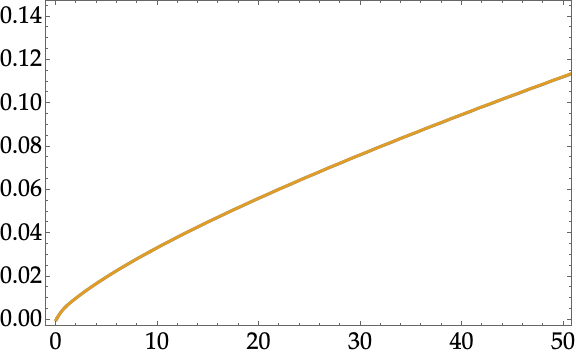

In [452]:
ListPlot[{gList,gsmoothList}]

In [453]:
gsmoothint[x_] = Interpolation[gsmoothList][x];

-Graphics-
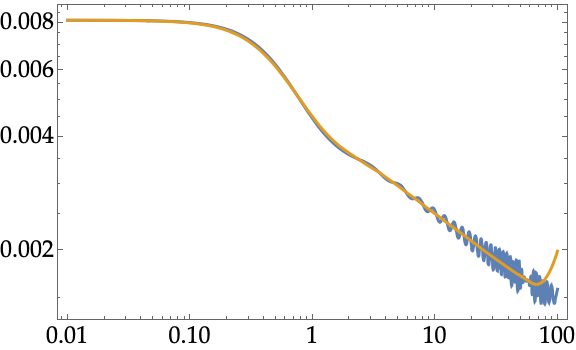

In [454]:
LogLogPlot[{gint'[x],gsmoothint'[x]},{x,0.01,100}]

In [455]:
gpsmoothList = Table[{10^logx, 10^(NIntegrate[Log10[gsmoothint'[10^(logx+logy)]],{logy,-0.2,0.2}]/0.4)},{logx,-2,2,0.01}];

In [456]:
gpsmoothint[x_] = Interpolation[gpsmoothList][x];

-Graphics-
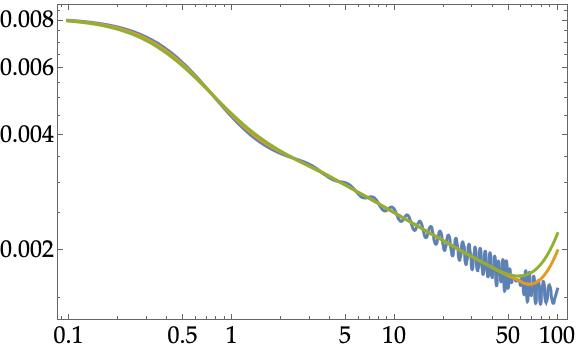

In [457]:
LogLogPlot[{gint'[x],gsmoothint'[x],gpsmoothint[x]},{x,0,100}]

In [458]:
gppsmoothList = Table[{10^logx, 10^(NIntegrate[Log10[gpsmoothint'[10^(logx+logy)]],{logy,-0.2,0.2}]/0.4)},{logx,-2,2,0.01}];

Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.: Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                                                                           -6
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in logy near {logy} = {0.19168}. NIntegrate obtained -2.03977 + 0.534387 I and 4.8961 10   for the integral and error estimates.

Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.: Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                                                                            -6
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in logy near {logy} = {0.18168}. NIntegrate obtained -2.05273 + 0.520743 I and 4.89616 10   for the integral and error estimates.

Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.: Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.

Further output of `1` will be suppressed during this calculation.: Further output of NIntegrate::slwcon will be suppressed during this calculation.

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.:                                                                                                                                                                          -6
NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in logy near {logy} = {0.17168}. NIntegrate obtained -2.06308 + 0.5071 I and 4.89616 10   for the integral and error estimates.

Further output of `1` will be suppressed during this calculation.: Further output of NIntegrate::ncvb will be suppressed during this calculation.

In [459]:
gppsmoothint[x_] = Interpolation[gppsmoothList][x];

-Graphics-
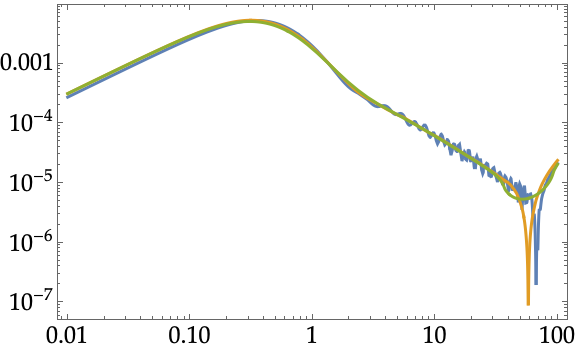

In [460]:
LogLogPlot[{Abs[gsmoothint''[x]],Abs[gpsmoothint'[x]],Abs[gppsmoothint[x]]},{x,0.01,100}]

-Graphics-
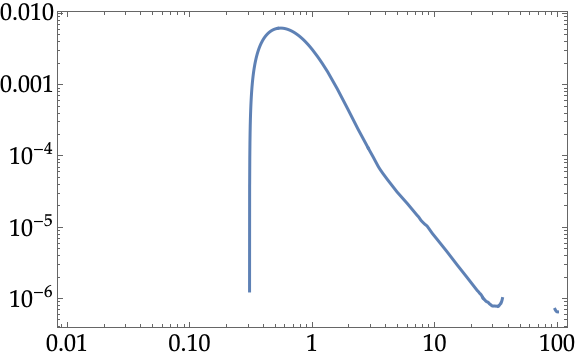

In [465]:
LogLogPlot[gppsmoothint'[x],{x,0.01,100}]

In [440]:
gpppsmoothList = Table[{10^logx, 10^(NIntegrate[Log10[gppsmoothint'[10^(logx+logy)]],{logy,-0.2,0.2}]/0.4)},{logx,-2,2,0.1}];

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.: NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in logy near {logy} = {-0.00262456}. NIntegrate obtained -0.601419 - 0.00656606 I and 0.0000398774 for the integral and error estimates.

Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.: Numerical integration converging too slowly; suspect one of the following: singularity, value of the integration is 0, highly oscillatory integrand, or WorkingPrecision too small.

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.: NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in logy near {logy} = {-0.1024417616432595}. NIntegrate obtained -0.601759 - 0.279474 I and 0.0000224267 for the integral and error estimates.

NIntegrate failed to converge to prescribed accuracy after `1` recursive bisections in `2` near `3` = `4`. NIntegrate obtained `5` and `6` for the integral and error estimates.: NIntegrate failed to converge to prescribed accuracy after 9 recursive bisections in logy near {logy} = {0.184764}. NIntegrate obtained -0.86717 - 0.52472 I and 0.0000115197 for the integral and error estimates.

Further output of `1` will be suppressed during this calculation.: Further output of NIntegrate::ncvb will be suppressed during this calculation.

In [441]:
gpppsmoothint[x_] = Interpolation[gpppsmoothList][x];

-Graphics-
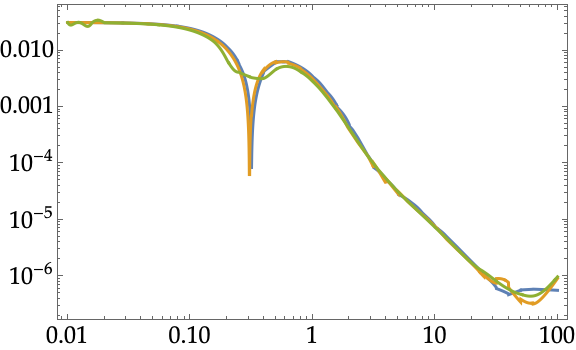

In [442]:
LogLogPlot[{Abs[gpsmoothint''[x]],Abs[gppsmoothint'[x]],Abs[gpppsmoothint[x]]},{x,0.01,100}]

In [470]:
g3List = Table[{10^logx, gsmoothint[10^logx]^2 gppsmoothint'[10^logx]/gpsmoothint[10^logx]^3}, {logx,-2,2,0.01}];

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[Opacity[1.], AbsoluteThickness[1.6], Dashing[{Small, Small}], 
 
>       RGBColor[0.882353, 0.611765, 0.141176]], 
 
>      Directive[Opacity[1.], AbsoluteThickness[1.6], Dashing[{0, Small, Small, Small}], 
 
                                                    2    2   2  (3)     2  (3)
                                                   g  g''   g  g       g  g
>       RGBColor[0.882353, 0.611765, 0.141176]]}, {-------, -------, -(-------)}, 
                                                       4        3          3
                                                     g'       g'         g'
 
>     LegendMarkers -> None, LabelStyle -> 
 
>      Directive[GrayLevel[0], FontFamily -> Palatino], LegendLayout -> {Row, 1}, 
 
>     LegendMarkerSize -> 30], {0.6, 0.15}, Identity]]
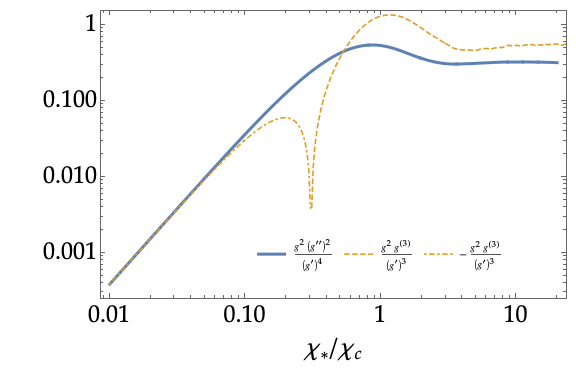

In [507]:
FiggderPhi4 = 
Show[LogLogPlot[{-gsmoothint[x]gppsmoothint[x]/gpsmoothint[x]^2,0,0}, {x,0.01,20} 
        ,PlotLegends->Placed[LineLegend[{(g g''/g'^2)^2,g^2g'''/g'^3,-g^2g'''/g'^3} ,LegendLayout->{"Row",1} 
                                ,LabelStyle->Directive[Black,FontFamily->"Palatino"] ,LegendMarkerSize->30],{0.6,0.15}]
        ,PlotStyle->{AbsoluteThickness[3],{Dashed,Color[[2]]},{DotDashed,Color[[2]]}}
        ,FrameLabel->{Row[{Subscript[\[Chi],"*"] ,"/" ,Subscript[\[Chi],c]}], None}] 
    ,ListLogLogPlot[g3List ,PlotStyle->{Dashed,Color[[2]]}] 
    ,ListLogLogPlot[g3List.DiagonalMatrix[{1,-1}] ,PlotStyle->{DotDashed,Color[[2]]}]
    ,ImagePadding->padding]

-Graphics-
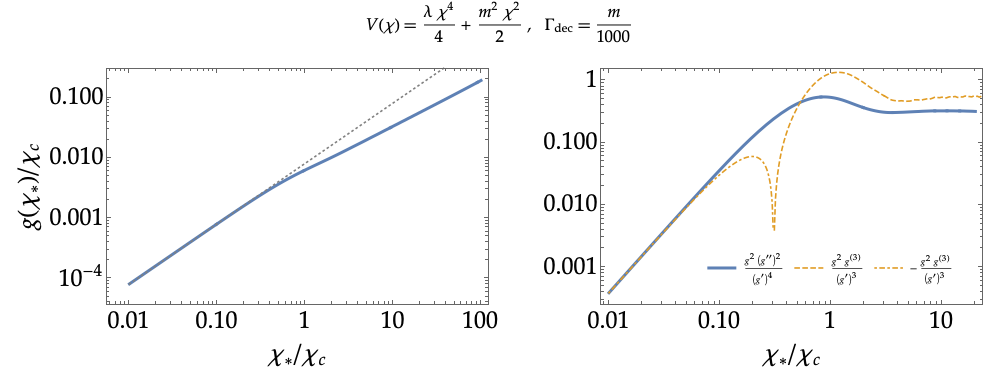

In [508]:
FiggandgderPhi4 = 
Show[GraphicsRow[{FiggPhi4,FiggderPhi4} ,ImageSize->1000 ,Spacings->0] 
    ,PlotLabel->Row[{V[\[Chi]]==1/2 m^2 \[Chi]^2 + 1/4 \[Lambda] \[Chi]^4 ," ,   " ,Subscript[\[CapitalGamma],"dec"]==10^-3 m}]
    ,LabelStyle->Directive[Black,Larger,FontFamily->"Palatino"]]

In [509]:
Export["g_gder_phi4.pdf", FiggandgderPhi4];